# Simple Milky Way Model with OMEGA+

Prepared by Benoit Côté (bcote@uvic.ca)

This notebook gives the input parameters of a simple Milky Way model with OMEGA+.  It also shows some of the observational constraints that you can use to calibrate your model.

In [1]:
# Import Python packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import JINAPyCEE codes
import omega_plus

### Run OMEGA+ Model

In [2]:
# Select the yields table
# IMPORTANT NOTE: By default, only stars between 1 and 30 Msun will eject yields.
# Stars above and below this limit will eject nothing.
# You can change this assumption with the "imf_yields_range" option
imf_yields_range = [1,30]
#table = 'yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt'
table = 'yield_tables/agb_and_massive_stars_K10_K06_0.5HNe.txt'

# Define the input parameters
kwargs = {"special_timesteps":150, "t_star":1.0, "table":table, "mgal":1.0,
          "m_DM_0":1.0e12, "sfe":2.3e-10, "mass_loading":0.55,
          "imf_yields_range":imf_yields_range}

# Define the inflow rates
exp_infall = [[100/2.2, 0.0, 0.68e9], [13.0/2.2, 1.0e9, 7.0e9]]

In [3]:
# Run the models
op_exp = omega_plus.omega_plus(exp_infall=exp_infall, **kwargs)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 9.27s
   OMEGA+ run completed - Run time: 9.28s


### Extract Output Quantities

In [4]:
# OMEGA+ time array
t_op = np.array(op_exp.inner.history.age)/1.0e9

# Get the inflow rates [Msun/yr]
inflow_rate_exp = op_exp.inner.m_inflow_t/op_exp.inner.history.timesteps

# Get the total mass of gas [Msun]
m_gas_exp = np.zeros(op_exp.inner.nb_timesteps+1)
for i_t in range(op_exp.inner.nb_timesteps+1):
    m_gas_exp[i_t] = sum(op_exp.inner.ymgal[i_t])
    
# Get the total mass lost by stars [Msun]
m_star_lost = 0.0
for i_t in range(op_exp.inner.nb_timesteps):
    m_star_lost += np.sum(op_exp.inner.mdot[i_t])
    
# Get the CC and Ia SNe rates [yr^-1]
cc_sne_rate = op_exp.inner.history.sn2_numbers[1:]/op_exp.inner.history.timesteps
Ia_sne_rate = op_exp.inner.history.sn1a_numbers[1:]/op_exp.inner.history.timesteps

# Stellar mass [Msun] .. corrected for stellar mass loss
print('Current stellar mass =','%.2E' %(np.sum(op_exp.inner.history.m_locked)-m_star_lost), 'Msun')

Current stellar mass = 3.56E+10 Msun


### Diagnostic Plot to Calibrate Your Milky Way Model

<IPython.core.display.Javascript object>


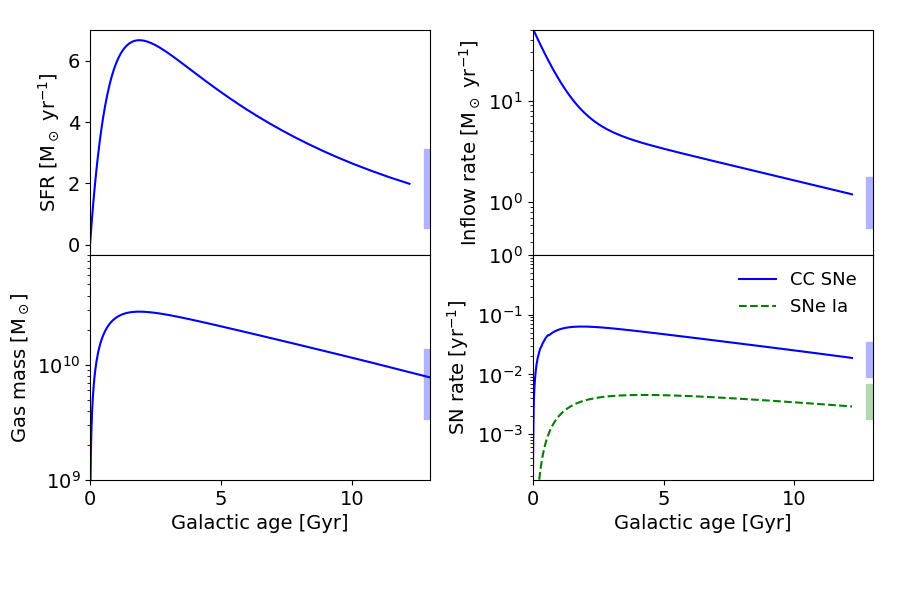

In [5]:
# Figure frame
%matplotlib nbagg
al_f = 14 # text font
matplotlib.rcParams.update({'font.size': 14.})
f, axarr = plt.subplots(2, 2, figsize=(9,6), sharex=True, sharey=False) # [row][col]
f.subplots_adjust(hspace=0.)
f.subplots_adjust(wspace=0.3)

# Plot SFR
axarr[0][0].plot([12.9,12.9], [0.65,3.0], linewidth=6, color='b', alpha=0.3)
axarr[0][0].plot(t_op[:-1], op_exp.inner.history.sfr_abs[:-1], '-b', linewidth=1.5)

# Plot inflows
axarr[0][1].plot([12.9,12.9], [0.6,1.6], linewidth=6, color='b', alpha=0.3)
axarr[0][1].plot(t_op[:-1], inflow_rate_exp, '-b', linewidth=1.5)

# Plot gas mass
axarr[1][0].plot([12.9,12.9], [3.6e9,12.6e9], linewidth=6, color='b', alpha=0.3)
axarr[1][0].plot(t_op, m_gas_exp, '-b', linewidth=1.5)

# Plot SNe rates
axarr[1][1].plot([12.9,12.9], [1e-2,3e-2], linewidth=6, color='b', alpha=0.3)
axarr[1][1].plot([12.9,12.9], [0.2e-2,0.6e-2], linewidth=6, color='g', alpha=0.3)
axarr[1][1].plot(t_op[:-1], cc_sne_rate, '-b', linewidth=1.5, label='CC SNe')
axarr[1][1].plot(t_op[:-1], Ia_sne_rate, '--g', linewidth=1.5, label='SNe Ia')
axarr[1][1].legend(frameon=False, fontsize=13)
    
    
# Y-axis
axarr[0][0].set_ylabel('SFR [M$_\odot$ yr$^{-1}$]', fontsize=al_f)
axarr[0][1].set_ylabel('Inflow rate [M$_\odot$ yr$^{-1}$]', fontsize=al_f)
axarr[0][1].set_yscale('log')
axarr[0][1].set_ylim(3e-1,5e1)
axarr[1][0].set_ylabel('Gas mass [M$_\odot$]', fontsize=al_f)
axarr[1][0].set_yscale('log')
axarr[1][0].set_ylim(1e9,9e10)
axarr[1][1].set_ylabel('SN rate [yr$^{-1}$]', fontsize=al_f)
axarr[1][1].set_yscale('log')
axarr[1][1].set_ylim(1.7e-4,1e0)

# X-axis
axarr[1][0].set_xlabel('Galactic age [Gyr]', fontsize=al_f)
axarr[1][1].set_xlabel('Galactic age [Gyr]', fontsize=al_f)
axarr[1][1].set_xlim(0,13)

# Adjust layout/white spaces
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.1)
plt.subplots_adjust(right=0.97)

The plot above is showing the predictions (lines) for the Milky Way model, while the vertical bands are observational constraints taken from <a href="http://adsabs.harvard.edu/abs/2015A%26A...580A.126K">Kubryk et al. (2015)</a>.  The gas mass represents the mass inside the galactic component, and the inflow rate represent the rate at which the circumgalactic gas is transfered into the galactic component.

<IPython.core.display.Javascript object>


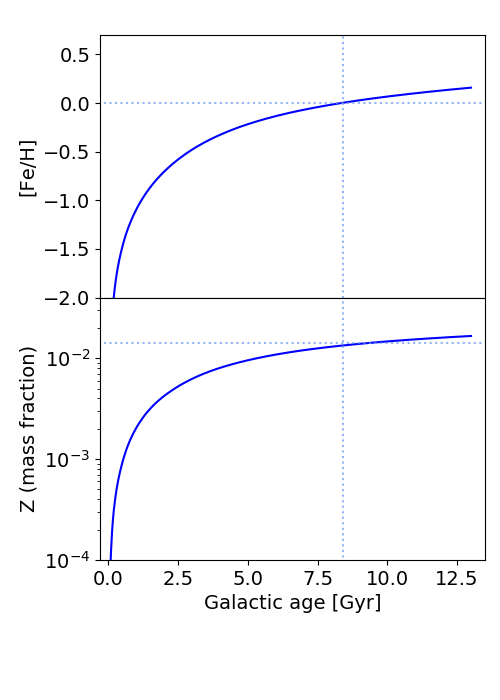

In [6]:
# Plot the age-metallicity relations
al_f = 14 # text font
matplotlib.rcParams.update({'font.size': 14.})
f, ax = plt.subplots(2,1, figsize=(5,7), sharex=True)
f.subplots_adjust(hspace=0)

# Extract predictions
o_t, o_Fe_H = op_exp.inner.plot_spectro(solar_norm='Asplund_et_al_2009', return_x_y=True)

# Plot age-[Fe/H]
# ===============
#ax[0].plot(13.-(np.array(t)), FeH, 'o', color='cornflowerblue', markersize=3, alpha=0.7)

ax[0].plot(np.array(o_t)/1e9, o_Fe_H, '-b', linewidth=1.5)

ax[0].plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
ax[0].plot([-1e10,1e10], [0,0], ':', color='cornflowerblue', alpha=0.7)
ax[0].set_xlim(-0.3,13.5)
ax[0].set_ylim(-2., 0.7)

# Plot age-Z
# ==========
ax[1].plot(np.array(op_exp.inner.history.age)/1e9, op_exp.inner.history.metallicity, '-b', linewidth=1.5)

ax[1].plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
ax[1].plot([-1e10,1e10], [0.014,0.014], ':', color='cornflowerblue', alpha=0.7)
ax[1].set_yscale('log')
ax[1].set_xlim(-0.3,13.5)
ax[1].set_ylim(1e-4, 4e-2)

# Labels and visual aspect
ax[0].legend(fontsize=16, loc=4, frameon=False)
ax[0].set_ylabel('[Fe/H]', fontsize=al_f)
ax[1].set_ylabel('Z (mass fraction)', fontsize=al_f)
ax[1].set_xlabel('Galactic age [Gyr]', fontsize=al_f)

# Adjust layout/white spaces
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.subplots_adjust(right=0.97)

The plot above shows the evolution of metallicity of the galactic gas.  The dotted lines mark the solar metallicity at the time the Sun formed, which is 4.5 Gyr before the end of the 13 Gyr-long simulation.